In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [2]:
# Load black for formatting
import jupyter_black

jupyter_black.load()

In [9]:
latex_path = "/Users/jakobnystrom/Library/TeX/texbin"

if latex_path not in os.environ["PATH"]:
    os.environ["PATH"] += os.pathsep + latex_path

In [3]:
print(os.environ["PATH"])

/Users/jakobnystrom/anaconda3/envs/biodiv/bin:/Users/jakobnystrom/anaconda3/condabin:/opt/homebrew/bin:/opt/homebrew/sbin:/Library/Frameworks/Python.framework/Versions/3.11/bin:/usr/local/bin:/System/Cryptexes/App/usr/bin:/usr/bin:/bin:/usr/sbin:/sbin:/var/run/com.apple.security.cryptexd/codex.system/bootstrap/usr/local/bin:/var/run/com.apple.security.cryptexd/codex.system/bootstrap/usr/bin:/var/run/com.apple.security.cryptexd/codex.system/bootstrap/usr/appleinternal/bin:/Library/TeX/texbin


In [4]:
sns.set_style("ticks")
plt.rc("figure", titlesize="medium")
plt.rc("font", size=10, family="serif")
plt.rc("axes", titlesize="medium")
plt.rc("text", usetex=True)
plt.rc("text.latex", preamble=r"\usepackage{amsmath}\usepackage{amssymb}")

## Summary chart

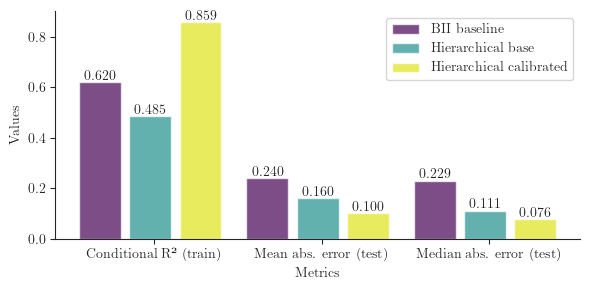

In [31]:
# Define the data
models = ["BII baseline", "Hierarchical base", "Hierarchical calibrated"]
metrics = [
    "Conditional R² (train)",
    "Mean abs. error (test)",
    "Median abs. error (test)",
]

# Example values
bii_baseline = [0.620, 0.240, 0.229]
hierarchical_base = [0.485, 0.160, 0.111]
hierarchical_calibrated = [0.859, 0.100, 0.076]

# Combine all data into a single array
data = np.array([bii_baseline, hierarchical_base, hierarchical_calibrated]).T

# Define the colors for each model using a continuous color gradient
colors = plt.cm.viridis(np.array([0, 0.5, 0.95]))

# Number of groups and bars
n_groups = len(metrics)
n_models = len(models)

# Create the plot
fig, ax = plt.subplots(figsize=(6, 3))

# Set the positions and width for the bars
index = np.arange(n_groups)
bar_width = 0.25
bar_space = 0.05  # Space between bars in the same group

# Plot bars for each model
for i in range(n_models):
    bars = ax.bar(
        index + i * (bar_width + bar_space) - bar_space / 2,
        data[:, i],
        bar_width,
        alpha=0.7,
        color=colors[i],
        label=models[i],
    )

    # Add bar labels
    for bar in bars:
        yval = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            yval,
            f"{yval:.3f}",
            ha="center",
            va="bottom",
            fontsize=10,
        )

# Add labels, title, and legend
sns.despine()
ax.set_xlabel("Metrics")
ax.set_ylabel("Values")
ax.set_xticks(index + (bar_width + bar_space) * (n_models - 1) / 2)
ax.set_xticklabels(metrics)
ax.legend()

# Show the plot
plt.tight_layout()
fig.savefig("../../figures/model_comparison.pdf")
plt.show()

In [ ]:
(0.240 - 0.160) / 0.240, (0.229 - 0.111) / 0.229, (0.240 - 0.100) / 0.240, (
    0.229 - 0.076
) / 0.229

## Difference in predictions

In [13]:
# Load files
df_bayes = pd.read_parquet(
    "../../data/output/model_comp/hierarchical.parquet"
).sort_values("SSBS")
df_bii = pd.read_parquet("../../data/output/model_comp/bii.parquet").sort_values("SSBS")

In [11]:
df_bayes.head(5)

,SSBS_idx,SSBS,Observed,Pred,Ref_pred_eco,Ref_pred_realm,Alpha_eco_site,Alpha_realm_site,Final_output_eco_1,Final_output_eco_2,Final_output_realm_1,Final_output_realm_2
6073,3520,AD1_2001__Liow 3 1,0.379657,0.481009,0.568278,0.371047,0.201742,0.201288,0.846432,2.384278,1.296354,2.389658
0,6946,AD1_2001__Liow 3 2,0.831756,0.586922,0.523365,0.242127,0.244876,0.242022,1.121439,2.396807,2.424028,2.425074
6074,5353,AD1_2002__Tonhasca 1 1,0.430810,0.564326,0.520739,0.420256,0.201742,0.201288,1.083702,2.797267,1.342813,2.803578
1,5134,AD1_2002__Tonhasca 1 2,0.474571,0.446719,0.514948,0.327628,0.244876,0.242022,0.867504,1.824264,1.363494,1.845778
2,6116,AD1_2002__Tonhasca 1 3,0.491721,0.442590,0.565225,0.360579,0.250350,0.245901,0.783033,1.767883,1.227443,1.799873


In [12]:
df_bii.head(5)

,SS,SSB,SSBS,Max_scaled_abundance_sqrt,Longitude,Latitude,Primary_vegetation_Light_use,Primary_vegetation_Intense_use,Secondary_vegetation_Minimal_use,Secondary_vegetation_Light_use,...,Secondary_vegetation_Minimal_use_x_Road_density_50km_cbrt,Secondary_vegetation_Light_use_x_Road_density_50km_cbrt,Secondary_vegetation_Intense_use_x_Road_density_50km_cbrt,Cropland_Minimal_use_x_Road_density_50km_cbrt,Cropland_Light_Intense_x_Road_density_50km_cbrt,Pasture_Minimal_use_x_Road_density_50km_cbrt,Pasture_Light_Intense_x_Road_density_50km_cbrt,Urban_All_uses_x_Road_density_50km_cbrt,Pred,Pred_final
0,AD1_2001__Liow 3,AD1_2001__Liow 3,AD1_2001__Liow 3 1,1.000000,103.533333,2.066667,0,0,0,0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.453745,1.051299
4554,AD1_2001__Liow 3,AD1_2001__Liow 3,AD1_2001__Liow 3 2,0.938499,103.150000,2.350000,0,0,0,0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.444436,1.022220
4555,AD1_2002__Tonhasca 1,AD1_2002__Tonhasca 1,AD1_2002__Tonhasca 1 1,0.735269,-41.796887,-21.868539,0,0,1,0,...,-0.805019,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.436491,0.999355
5334,AD1_2002__Tonhasca 1,AD1_2002__Tonhasca 1,AD1_2002__Tonhasca 1 2,0.934328,-41.780080,-21.903821,0,0,1,0,...,-0.750717,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.454287,1.052555
741,AD1_2002__Tonhasca 1,AD1_2002__Tonhasca 1,AD1_2002__Tonhasca 1 3,0.801586,-41.792548,-21.919691,0,0,1,0,...,-0.765100,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.460191,1.062159


In [45]:
bayes_data = df_bayes["Final_output_eco_2"]
bayes_data = np.where(bayes_data > 1, 1, bayes_data)
bii_data = df_bii["Pred_final"]
bii_data = np.where(bii_data > 1, 1, bii_data)
mean_bayes = np.mean(bayes_data)
mean_bii = np.mean(bii_data)

In [48]:
bayes_data = df_bayes["Pred"]
bayes_data = np.where(bayes_data > 1, 1, bayes_data)
bii_data = df_bii["Pred"]
bii_data = np.where(bii_data > 1, 1, bii_data)
mean_bayes = np.mean(bayes_data)
mean_bii = np.mean(bii_data)

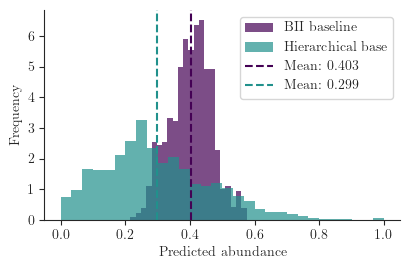

In [49]:
colors = plt.cm.viridis(
    np.array([0, 0.5])
)  # Getting the first (teal) and second (purple) colors from the viridis colormap

fig = plt.figure(figsize=(4.2, 2.8))

plt.hist(
    bii_data,
    bins=30,
    color=colors[0],  # Use the purple color for the second histogram
    alpha=0.7,
    label="BII baseline",
    density=True,
    edgecolor="none",
)
plt.hist(
    bayes_data,
    bins=30,
    color=colors[1],  # Use the teal color for the first histogram
    alpha=0.7,
    label="Hierarchical base",
    density=True,
    edgecolor="none",
)

plt.axvline(x=mean_bii, color=colors[0], linestyle="--", label=f"Mean: {mean_bii:.3f}")
plt.axvline(
    x=mean_bayes, color=colors[1], linestyle="--", label=f"Mean: {mean_bayes:.3f}"
)

plt.xlabel("Predicted abundance")
plt.ylabel("Frequency")
sns.despine()

plt.legend()
plt.tight_layout()
fig.savefig("../../figures/predicted_distribution.pdf")
plt.show()

In [50]:
bii_pred = df_bii["Pred"]
bii_final = df_bii["Pred_final"]
bii_final_cap = np.where(bii_final > 1, 1, bii_final)

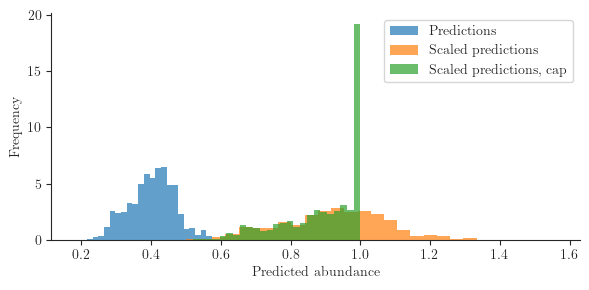

In [53]:
fig = plt.figure(figsize=(6, 3))
colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]

plt.hist(
    bii_pred,
    bins=30,
    color=colors[0],
    alpha=0.7,
    label="Predictions",
    density=True,
    edgecolor="none",
)
plt.hist(
    bii_final,
    bins=30,
    color=colors[1],
    alpha=0.7,
    label="Scaled predictions",
    density=True,
    edgecolor="none",
)
plt.hist(
    bii_final_cap,
    bins=30,
    color=colors[2],
    alpha=0.7,
    label="Scaled predictions, cap",
    density=True,
    edgecolor="none",
)

plt.xlabel("Predicted abundance")
plt.ylabel("Frequency")
sns.despine()

plt.legend()
plt.tight_layout()
fig.savefig("../../figures/final_output_analysis.pdf")
plt.show()